In [1]:
import pandas as pd

# Caminho para o dataset usado pelo NB3
csv_path = "data/etl/features_daily_labeled.csv"  # ou o caminho real no teu projeto
df = pd.read_csv(csv_path)

# Ver tamanho e colunas
print("Linhas e colunas:", df.shape)
print("\nColunas disponíveis:\n", df.columns.tolist())


Linhas e colunas: (365, 24)

Colunas disponíveis:
 ['date', 'sleep_total_h', 'sleep_efficiency', 'apple_hr_mean', 'apple_hr_max', 'apple_hrv_rmssd', 'steps', 'exercise_min', 'stand_hours', 'move_kcal', 'missing_sleep', 'missing_cardio', 'missing_activity', 'source_sleep', 'source_cardio', 'source_activity', 'sleep_sub', 'cardio_sub', 'activity_sub', 'pbsi_score', 'pbsi_quality', 'label_3cls', 'label_2cls', 'segment_id']


In [2]:
pd.set_option("display.max_columns", 20)   # mostra até 20 colunas
print(df.head(10))


         date  sleep_total_h  sleep_efficiency  apple_hr_mean  apple_hr_max  \
0  2024-01-01       6.872701          0.735136      66.570632    108.826402   
1  2024-01-02       9.753572          0.936417      92.582989    111.024310   
2  2024-01-03       8.659970          0.916873      86.607889    109.321913   
3  2024-01-04       7.993292          0.668527      80.922617    138.979224   
4  2024-01-05       5.780093          0.624276      74.353219    117.506263   
5  2024-01-06       5.779973          0.635272      95.088022    102.892134   
6  2024-01-07       5.290418          0.606378      75.697804    148.455132   
7  2024-01-08       9.330881          0.633055      92.663978    144.189294   
8  2024-01-09       8.005575          0.839052      77.565396    146.387614   
9  2024-01-10       8.540363          0.624916      75.077777    149.745391   

   apple_hrv_rmssd         steps  exercise_min  stand_hours    move_kcal  ...  \
0        43.631864   8893.927732     31.234423   

In [3]:
print(df.describe(include='all').T.head(15))  # mostra resumo das 15 primeiras colunas numéricas


                  count unique         top freq        mean         std  \
date                365    365  2024-01-01    1         NaN         NaN   
sleep_total_h     365.0    NaN         NaN  NaN    7.457735    1.455353   
sleep_efficiency  365.0    NaN         NaN  NaN    0.773125    0.105223   
apple_hr_mean     365.0    NaN         NaN  NaN   79.936155    11.61732   
apple_hr_max      365.0    NaN         NaN  NaN  125.515255   14.886771   
apple_hrv_rmssd   365.0    NaN         NaN  NaN   49.458659   17.221428   
steps             365.0    NaN         NaN  NaN  8673.82106  3700.08755   
exercise_min      365.0    NaN         NaN  NaN    59.68476   34.727714   
stand_hours       365.0    NaN         NaN  NaN    9.867172    3.537083   
move_kcal         365.0    NaN         NaN  NaN   1744.7845  704.701846   
missing_sleep     365.0    NaN         NaN  NaN    0.509589    0.500594   
missing_cardio    365.0    NaN         NaN  NaN    0.531507    0.499691   
missing_activity  365.0  

In [4]:
for col in ["date", "segment_id", "label_3cls"]:
    print(col, "→", col in df.columns)


date → True
segment_id → True
label_3cls → True


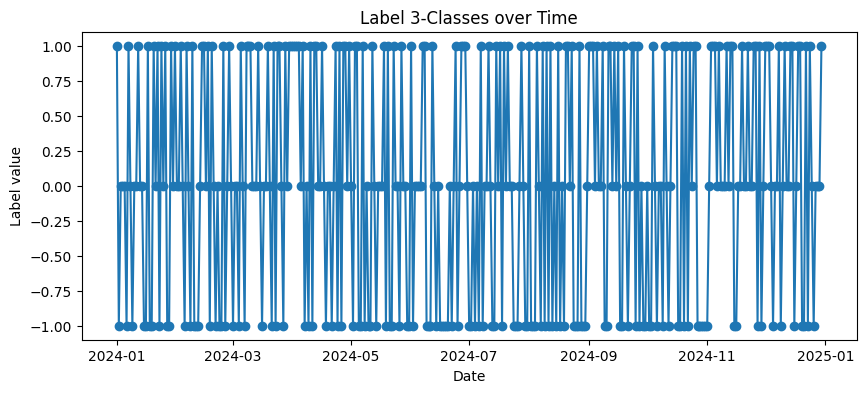

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(pd.to_datetime(df["date"]), df["label_3cls"], marker='o')
plt.title("Label 3-Classes over Time")
plt.xlabel("Date")
plt.ylabel("Label value")
plt.show()


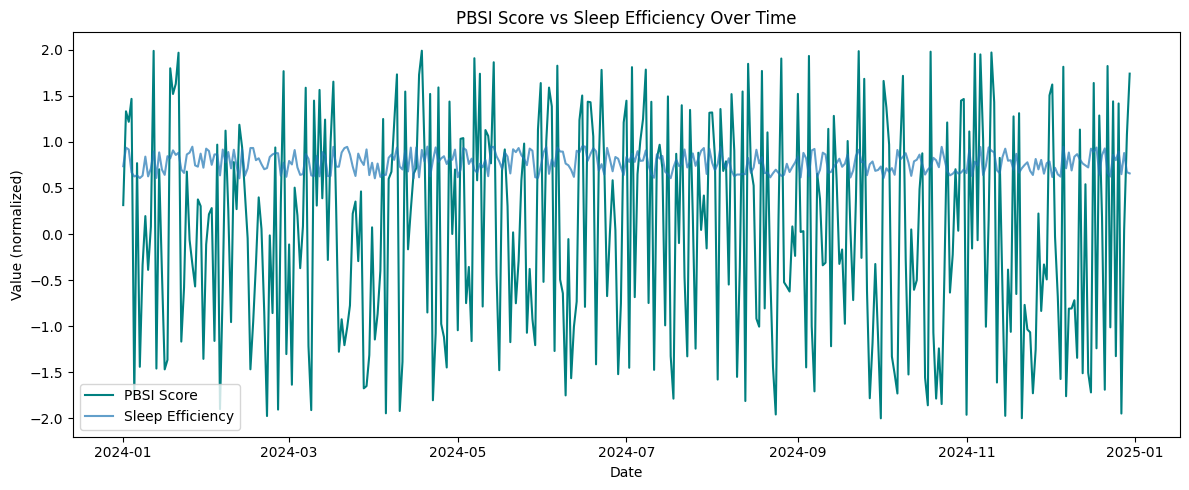

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df["date"] = pd.to_datetime(df["date"])

plt.figure(figsize=(12,5))
plt.plot(df["date"], df["pbsi_score"], label="PBSI Score", color="teal")
plt.plot(df["date"], df["sleep_efficiency"], label="Sleep Efficiency", alpha=0.7)
plt.title("PBSI Score vs Sleep Efficiency Over Time")
plt.xlabel("Date")
plt.ylabel("Value (normalized)")
plt.legend()
plt.tight_layout()
plt.show()


In [7]:
df["segment_id"].value_counts()


segment_id
1    61
2    61
3    61
4    61
5    61
6    60
Name: count, dtype: int64

In [8]:
df.corr(numeric_only=True)["pbsi_score"].sort_values(ascending=False).head(10)


pbsi_score          1.000000
sleep_efficiency    0.111190
pbsi_quality        0.106886
steps               0.041917
missing_activity    0.031501
missing_sleep       0.030609
activity_sub        0.029622
sleep_total_h       0.027936
sleep_sub           0.017741
label_3cls          0.006461
Name: pbsi_score, dtype: float64

In [9]:
df["label_3cls"].value_counts()


label_3cls
 1    125
-1    123
 0    117
Name: count, dtype: int64

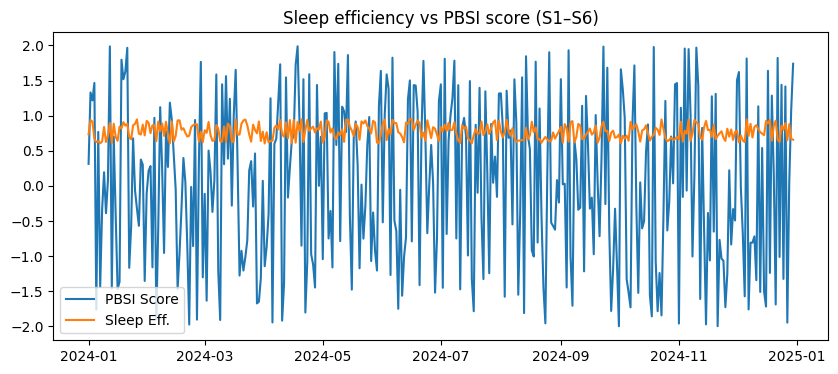

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(df["date"], df["pbsi_score"], label="PBSI Score")
plt.plot(df["date"], df["sleep_efficiency"], label="Sleep Eff.")
plt.title("Sleep efficiency vs PBSI score (S1–S6)")
plt.legend(); plt.show()


In [11]:
df.groupby("segment_id")[["sleep_efficiency","pbsi_score"]].mean()


,sleep_efficiency,pbsi_score
segment_id,,
1,0.783065,-0.015390
2,0.777057,-0.030245
3,0.804395,0.204254
4,0.751346,0.153079
5,0.751697,-0.099926
6,0.771154,-0.136384


In [12]:
df.groupby("segment_id")[["sleep_efficiency","pbsi_score"]].corr().iloc[0::2,-1]


segment_id                  
1           sleep_efficiency    0.329270
2           sleep_efficiency    0.085380
3           sleep_efficiency   -0.005680
4           sleep_efficiency    0.290762
5           sleep_efficiency   -0.153897
6           sleep_efficiency    0.093578
Name: pbsi_score, dtype: float64

<Axes: xlabel='segment_id', ylabel='pbsi_score'>

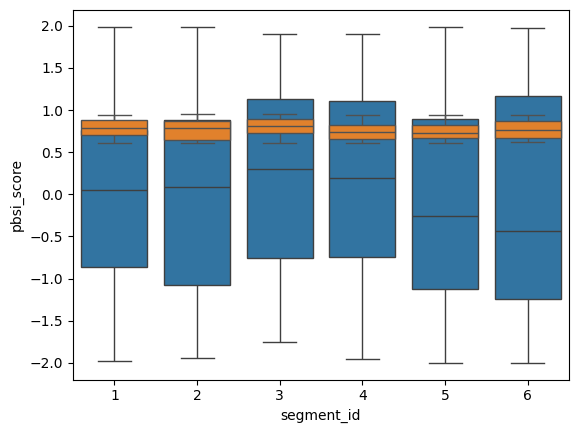

In [13]:
import seaborn as sns
sns.boxplot(data=df, x="segment_id", y="pbsi_score")
sns.boxplot(data=df, x="segment_id", y="sleep_efficiency")
